In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
df = pd.read_csv('House_Rent_Dataset.csv')

df_cleaned = df.dropna()
df_cleaned = df.dropna(axis=1)


In [5]:
print(df.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [4]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,2,Bandel,Kolkata,2,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,2,"Phool Bagan, Kankurgachi",Kolkata,1,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,2,Salt Lake City Sector 2,Kolkata,1,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,2,Dumdum Park,Kolkata,2,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,1,South Dum Dum,Kolkata,2,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,1,Bandam Kommu,Hyderabad,1,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,2,"Manikonda, Hyderabad",Hyderabad,1,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,1,"Himayath Nagar, NH 7",Hyderabad,1,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,1,Gachibowli,Hyderabad,1,Family,2,Contact Agent


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Area Type'] = labelencoder.fit_transform(df['Area Type'])
df['Furnishing Status'] = labelencoder.fit_transform(df['Furnishing Status'])
X = df[['Area Type', 'Furnishing Status', 'Size', 'BHK']]
y = df['Rent'] 

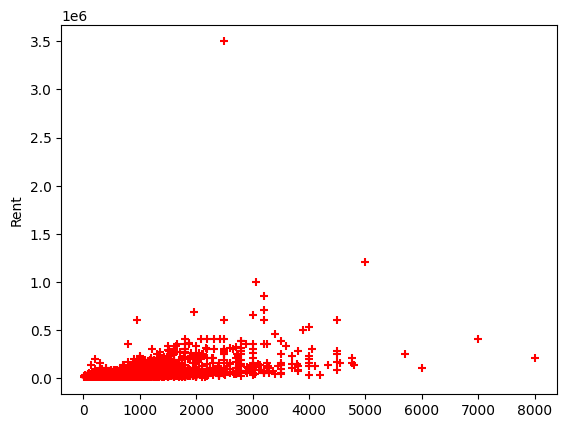

In [7]:
%matplotlib inline

plt.ylabel('Rent')
plt.scatter(df['Size'],df['Rent'],color='red',marker='+')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Predicted rents:", y_pred)
print("Actual rents:", y_test.values)

Predicted rents: [ 2.04430650e+04  2.43030442e+04  3.37059835e+04  7.31028552e+04
  9.87837157e+04  5.22940349e+04  4.46155393e+04  1.36380680e+04
  1.34641591e+05  1.18910707e+04  1.18910707e+04  1.38210603e+04
  5.05470376e+04  2.25672358e+04  5.91268767e+04 -3.85974992e+03
  1.30964604e+05  9.96108107e+03  2.56840569e+04  9.96737995e+04
  6.01205829e+04  1.01552623e+04  2.62442228e+04  5.75350269e+04
  1.18513596e+05  2.76530802e+04 -5.60674723e+03  5.89048506e+04
 -1.45247261e+04 -2.11275260e+03 -1.62717234e+04 -1.46644859e+04
  2.59060829e+04  4.53060457e+04  4.86337038e+04  5.26322455e+04
  3.11470749e+04 -1.27777288e+04  2.41200519e+04  9.96108107e+03
  2.41200519e+04  1.34458598e+05  2.60500415e+04 -1.27777288e+04
  3.46410695e+04  1.71320626e+04  3.48240618e+04  5.50975232e+04
  1.44940582e+05  3.82790227e+04  3.28940722e+04  8.97159148e+04
  3.02428351e+04  3.63768779e+04  8.39707606e+03  9.77716547e+04
  6.71630643e+04  2.58753418e+04  1.38124203e+03  5.05470376e+04
  2.9730

In [13]:
model.score(X_train,y_train)

0.1916375603791326

In [14]:
model.score(X_test,y_test)

0.37044193431678873

In [15]:
import pickle
filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {filename}")

Model saved as linear_regression_model.pkl
